In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minzzzzi","key":"74a980fb52033cf0ead89c84120a4a9c"}'}

In [2]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle

Uninstalling kaggle-1.5.8:
  Successfully uninstalled kaggle-1.5.8
     |████████████████████████████████| 1.5MB 3.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 59 kB 1.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73274 sha256=7a3c52a9033731aecdefc63e5023f49dac558edc4c9391ffbf00e97a011cd0c1
  Stored in directory: /root/.cache/pip/wheels/cf/aa/f0/ed1179bbcd729b29d0dfda59826fb3b55f0a4a0c3f713c1c82
Successfully built kaggle


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json 

In [4]:
!kaggle competitions download -c stay-or-leave

  0% 0.00/72.5k [00:00<?, ?B/s]
100% 72.5k/72.5k [00:00<00:00, 36.5MB/s]


In [5]:
!unzip stay-or-leave.zip

Archive:  stay-or-leave.zip
  inflating: submit.csv              
  inflating: test_data.csv           
  inflating: train_data.csv          


In [6]:
import pandas as pd
import numpy as np

In [7]:
train = pd.read_csv('train_data.csv',header= None, skiprows=1)
test = pd.read_csv('test_data.csv',header=None,skiprows=1)
submit = pd.read_csv('submit.csv')

train[:5]

,0,1,2,3,4,5,6,7,8,9
0,0.45,0.54,2,135,3,0,0,1,2,1
1,0.11,0.81,6,305,4,0,0,1,2,1
2,0.84,0.92,4,234,5,0,0,1,2,1
3,0.41,0.55,2,148,3,0,0,1,2,1
4,0.36,0.56,2,137,3,0,0,1,2,1


In [8]:
x_train = train.loc[:,:8]
y_train = train.loc[:,9]

x_test = test.loc[:,:8]

In [9]:
from sklearn import preprocessing

In [10]:
rob = preprocessing.RobustScaler()
sc = preprocessing.StandardScaler()

In [11]:
x_train_rob = rob.fit_transform(x_train)
x_train_sc = sc.fit_transform(x_train)

x_test_rob = rob.fit_transform(x_test)
x_test_sc = sc.fit_transform(x_test)

In [12]:
from sklearn.metrics import accuracy_score

---
#KNN
---

In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', p = 2)
'''
KNN.fit(x_train_rob,y_train)
train_rob_pred = KNN.predict(x_train_rob)
print(accuracy_score(y_train,train_rob_pred))


KNN.fit(x_train_sc,y_train)
train_sc_pred = KNN.predict(x_train_sc)
print(accuracy_score(y_train,train_sc_pred))
'''
KNN.fit(x_train,y_train)
train_pred = KNN.predict(x_train)
print(accuracy_score(y_train,train_pred))


1.0


In [33]:
test_pred = KNN.predict(x_test)

for i in range(len(test_pred)):
  submit['Expected'][i] = test_pred[i]
submit['Expected'] = submit['Expected'].astype(int)
submit.to_csv('submission.csv',header=True,index=None)
#!kaggle competitions submit -c stay-or-leave -f submission.csv -m "KNN"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_pred = KNN.predict(x_test_sc)

for i in range(len(test_pred)):
  submit['Expected'][i] = test_pred[i]

submit['Expected'] = submit['Expected'].astype(int)
submit.to_csv('submission.csv',header=True,index=None)
!kaggle competitions submit -c stay-or-leave -f submission.csv -m "KNN_sc"

100% 252/252 [00:02<00:00, 86.3B/s]
Successfully submitted to SejongAI.텀프로젝트.[퇴사여부예측]

---

In [31]:
from collections import Counter

In [36]:
print(Counter(y_train))

Counter({0: 8550, 1: 1450})


In [42]:
from imblearn.over_sampling import SMOTE
ada = SMOTE(random_state = 1)
x_syn, y_syn = ada.fit_resample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
print(Counter(y_syn))

Counter({1: 8550, 0: 8550})


In [45]:
KNN.fit(x_syn,y_syn)
train_pred = KNN.predict(x_syn)
print(accuracy_score(y_syn,train_pred))

1.0


In [46]:
test_pred = KNN.predict(x_test)

for i in range(len(test_pred)):
  submit['Expected'][i] = test_pred[i]

submit['Expected'] = submit['Expected'].astype(int)
submit.to_csv('submission.csv',header=True,index=None)
!kaggle competitions submit -c stay-or-leave -f submission.csv -m "KNN_syn"

100% 252/252 [00:01<00:00, 184B/s]
Successfully submitted to SejongAI.텀프로젝트.[퇴사여부예측]

####n_neighbors = 5, weights = 'distance', p = 2) + rob / 0.52
#### (n_neighbors = 7, weights = 'distance', p = 2) + sc / 0.80
#### (n_neighbors = 5, weights = 'distance', p = 2) + sc / 0.76
#### (n_neighbors = 10, weights = 'distance', p = 2) / 0.92
#### (n_neighbors = 5, weights = 'distance', p = 2) / 0.90
#### (n_neighbors = 5, weights = 'distance', p = 2) + Syn / 0.92


---
#LDA QDA
---

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()

LDA.fit(x_train_sc,y_train)
QDA.fit(x_train_sc,y_train)

train_pred_lda = LDA.predict(x_train_sc)
train_pred_qda = QDA.predict(x_train_sc)

print(accuracy_score(y_train,train_pred_lda))
print(accuracy_score(y_train,train_pred_qda))

0.8439
0.9357


In [ ]:
test_pred = QDA.predict(x_test_sc)

for i in range(len(test_pred)):
  submit['Expected'][i] = test_pred[i]

submit['Expected'] = submit['Expected'].astype(int)
submit.to_csv('submission.csv',header=True,index=None)
!kaggle competitions submit -c stay-or-leave -f submission.csv -m "qda_sc"

100% 252/252 [00:02<00:00, 85.7B/s]
Successfully submitted to SejongAI.텀프로젝트.[퇴사여부예측]

#### QDA - original / 0.90
#### LDA - original / 0.50
#### QDA - rob / 0.60
#### QDA - sc / 0.84

---
# Logistic Regression
---

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C = 0.1, random_state = 1, solver = 'sag', max_iter = 10000)

logit.fit(x_train,y_train)
train_pred = logit.predict(x_train)
print(accuracy_score(y_train,train_pred))

0.8383


In [ ]:
test_pred = logit.predict(x_test)

for i in range(len(test_pred)):
  submit['Expected'][i] = test_pred[i]

submit['Expected'] = submit['Expected'].astype(int)
submit.to_csv('submission.csv',header=True,index=None)
!kaggle competitions submit -c stay-or-leave -f submission.csv -m "logit"

100% 252/252 [00:01<00:00, 145B/s]
Successfully submitted to SejongAI.텀프로젝트.[퇴사여부예측]

#### (C = 0.1,class_weight = 'balanced', random_state = 1, solver = 'sag', max_iter = 10000) / 0.84
#### (C = 0.1, random_state = 1, solver = 'sag', max_iter = 10000) / 0.42

---
# Decision Tree
---

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini',random_state = 1,class_weight = 'balanced')

dtc.fit(x_train,y_train)
train_pred = dtc.predict(x_train)
print(accuracy_score(y_train,train_pred))

1.0


In [ ]:
test_pred = dtc.predict(x_test)

for i in range(len(test_pred)):
  submit['Expected'][i] = test_pred[i]

submit['Expected'] = submit['Expected'].astype(int)
submit.to_csv('submission.csv',header=True,index=None)
!kaggle competitions submit -c stay-or-leave -f submission.csv -m "dtc"

100% 252/252 [00:01<00:00, 147B/s]
Successfully submitted to SejongAI.텀프로젝트.[퇴사여부예측]

---

In [52]:
dtc.fit(x_syn,y_syn)
train_pred = dtc.predict(x_syn)
print(accuracy_score(y_syn,train_pred))

test_pred = dtc.predict(x_test)

for i in range(len(test_pred)):
  submit['Expected'][i] = test_pred[i]

submit['Expected'] = submit['Expected'].astype(int)
submit.to_csv('submission.csv',header=True,index=None)
!kaggle competitions submit -c stay-or-leave -f submission.csv -m "dtc_syn"

1.0
100% 252/252 [00:01<00:00, 170B/s]
Successfully submitted to SejongAI.텀프로젝트.[퇴사여부예측]

####(criterion = 'gini',random_state = 1,class_weight = 'balanced') / 0.96
####(criterion = 'entropy',random_state = 1,class_weight = 'balanced') / 0.96
####(criterion = 'entropy',random_state = 1,class_weight = 'balanced',max_depth=5) / 0.94
####(criterion = 'gini',random_state = 1,class_weight = 'balanced') + syn / 1.00

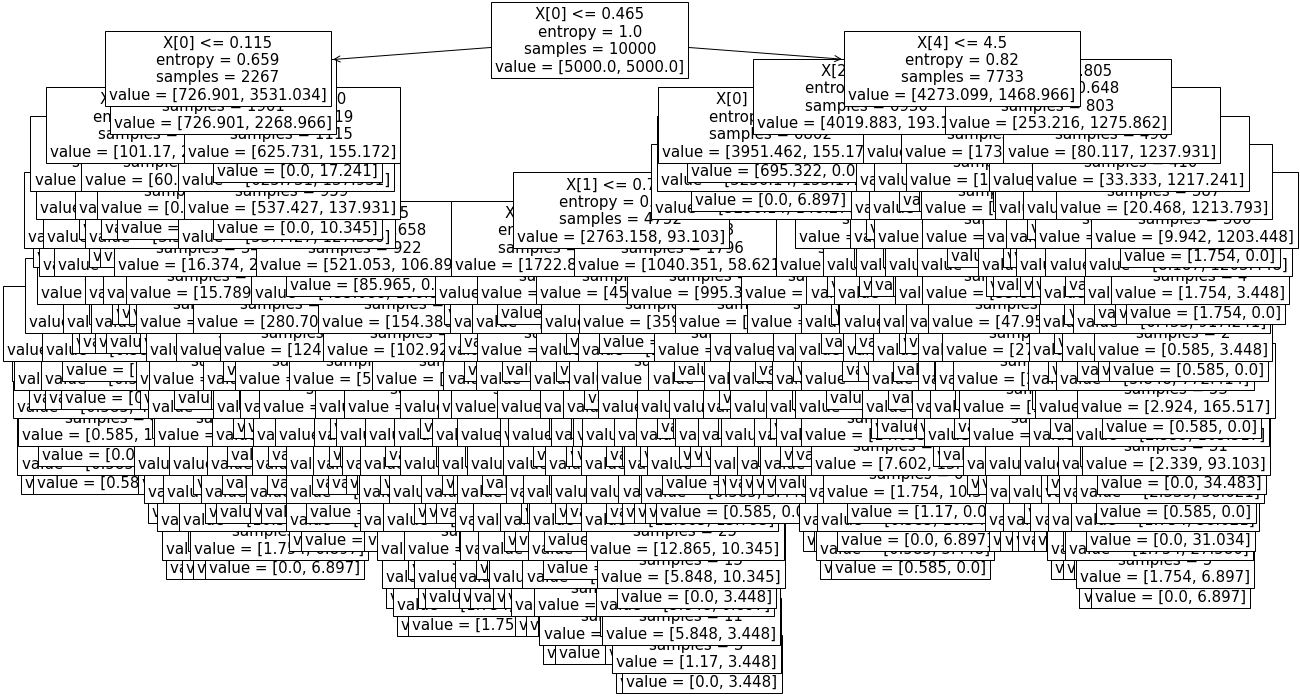

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
#tree.plot_tree(dtc.fit(X_train,y_train))
fig, ax = plt.subplots(figsize=(20, 12))
tree.plot_tree(dtc.fit(x_train, y_train), fontsize=15)
plt.savefig('tree_high_dpi', dpi=100)

# max depth 설정 안했을 때 

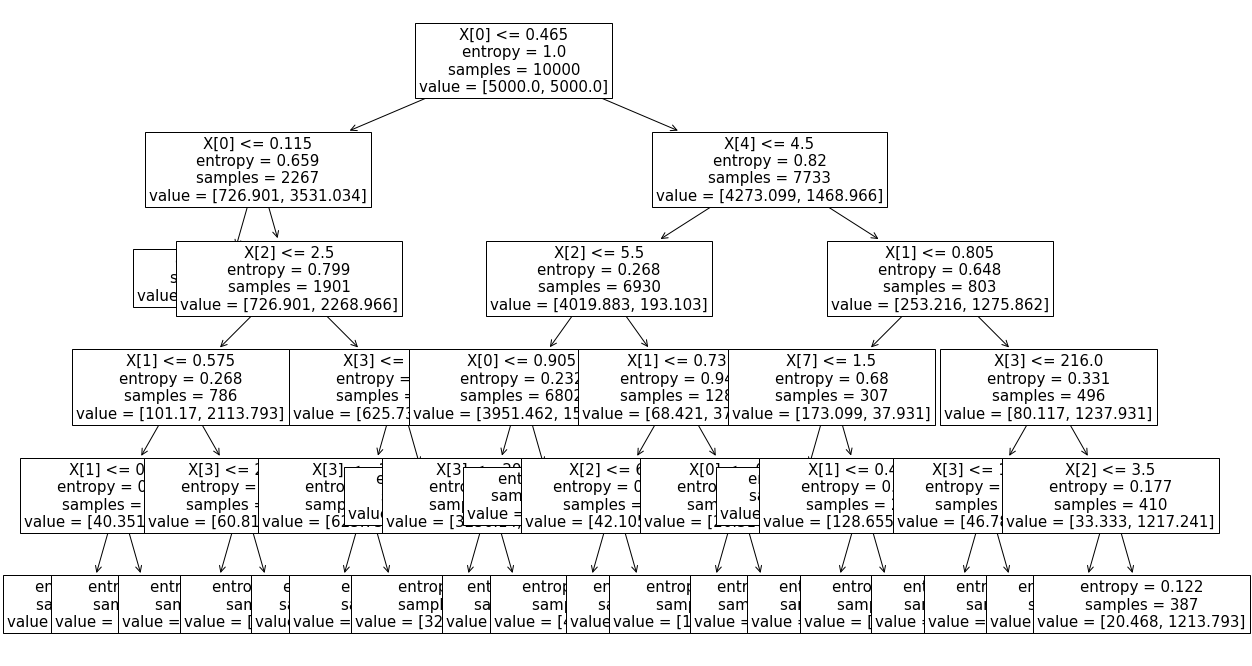

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
#tree.plot_tree(dtc.fit(X_train,y_train))
fig, ax = plt.subplots(figsize=(20, 12))
tree.plot_tree(dtc.fit(x_train, y_train), fontsize=15)
plt.savefig('tree_high_dpi', dpi=100)

# max depth 5로 설정했을 때 